In [78]:
import functions

import numpy as np
import pandas as pd
import importlib
from scipy.stats import pearsonr, spearmanr
from scipy.stats import linregress


importlib.reload(functions)

<module 'functions' from '/Users/maylismuller/Desktop/EPFL_DOCS/Master/MA4/Project Hummel/uphummel_MA4/functions.py'>

In [79]:

excel_folder_path = "data/"
FM_folder_path = "data/Raw_MissingDataImputed/"
regression_info, rsfMRI_full_info = functions.load_excel_data(excel_folder_path, FM_folder_path)
folder_path = "FC_matrices_times_wp11/"

rois = [363, 364, 365, 368, 372, 373, 374, 377, 379, 361, 370, 362, 371, 12, 54, 56, 78, 96, 192, 234, 236, 258, 276, 8, 9, 51, 52, 53, 188, 189, 231, 232, 233]
rois = [roi - 1 for roi in rois]
rois_sub = rois
rois_full = np.arange(0, 379)
selected_rois = [362, 363, 364, 367, 371, 372, 373, 376]

striatum_labels = [
    'Caudate_ipsi', 'Putamen_ipsi', 'Caudate_contra', 'Putamen_contra', 'Pallidum_ipsi', 'Pallidum_contra', 
    'Accumbens_ipsi', 'Accumbens_contra'
]
# Step 1: Filter regression info to T1 and matching conditions
regression_T3 = regression_info[
    (regression_info["TimePoint"] == "T3") &
    (regression_info["Behavioral_assessment"] == 1) &
    (regression_info["MRI"] == 1)
].copy()

Trying to load: TiMeS_matrix_mdImputed_allT4.xlsx
✅ Successfully loaded: TiMeS_matrix_mdImputed_allT4.xlsx
Trying to load: TiMeS_matrix_mdImputed_allT3.xlsx
✅ Successfully loaded: TiMeS_matrix_mdImputed_allT3.xlsx
Trying to load: TiMeS_matrix_mdImputed_allT2.xlsx
✅ Successfully loaded: TiMeS_matrix_mdImputed_allT2.xlsx
Trying to load: TiMeS_matrix_mdImputed_allT1.xlsx
✅ Successfully loaded: TiMeS_matrix_mdImputed_allT1.xlsx


In [80]:
all_matrices, all_subjects, yeo_mat_all_rois, roi_mapping_yeo = functions.load_matrices(folder_path, rsfMRI_full_info, rois, request_type='all', plot=False)
t1_t3_t4_matched = all_matrices.copy().dropna(subset=['T1_matrix', 'T3_matrix', 'T4_matrix'])

roi_mapping = functions.load_roi_labels("data/HCP-MMP1_RegionsCorticesList_379.csv")  # adapt path


df_aligned = functions.switch_contra_ipsi_df(
    t1_t3_t4_matched,  
    tp=3, 
    rois=rois,
    roi_mapping=roi_mapping
)

df_aligned = df_aligned.merge(t1_t3_t4_matched[['subject_id', 'Lesion_side']], on='subject_id', how='left')

# T3 whole group

## fmi pearson

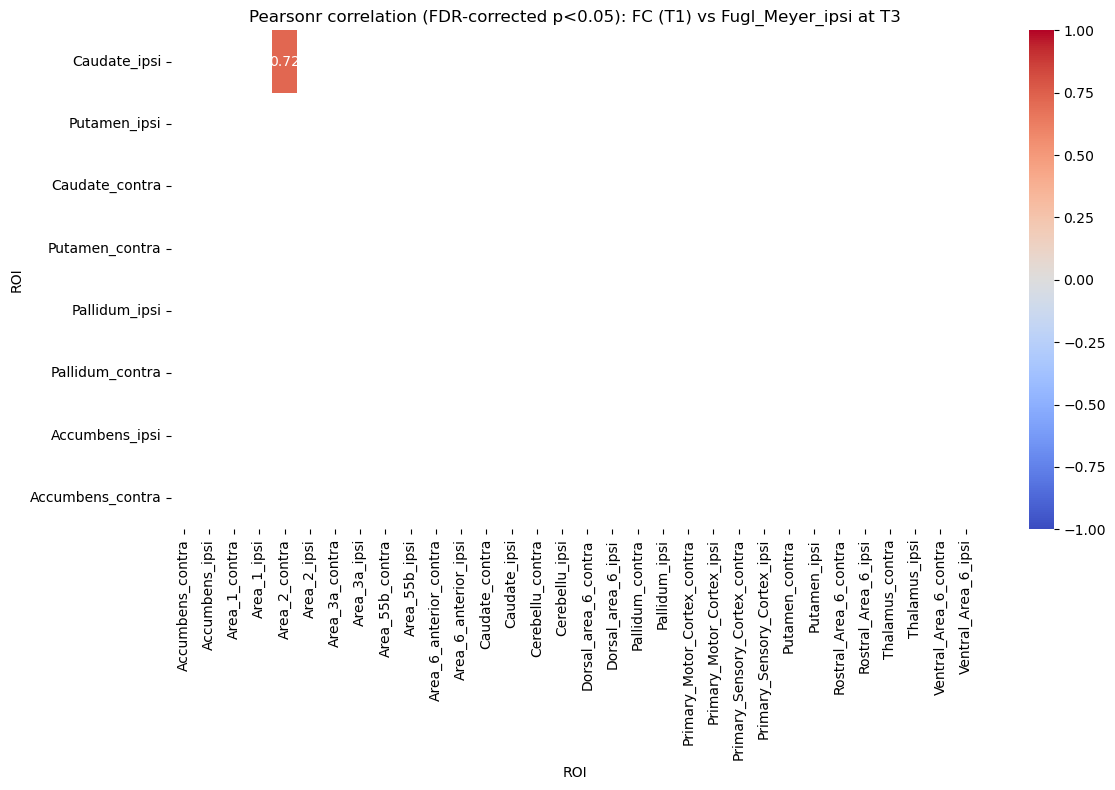

In [81]:
corr, pval, pval_corrected = functions.motor_correlation(
    df_aligned,                   # DataFrame with subject_id and T1_matrix (named ROIs)
    regression_info,              # Behavioral data
    tp=3,
    motor_test='Fugl_Meyer_ipsi',
    corr_type='pearsonr',
    selected_rois_labels=striatum_labels,    
    mask_significant_only=True     
)

import matplotlib.pyplot as plt

In [82]:
# Extract Caudate_ipsi x Area2_contra values from the T1_matrix DataFrames for all subjects
caudate_ipsi_area2_contra = df_aligned["T1_matrix"].apply(lambda mat: mat.loc["Caudate_ipsi", "Area_2_contra"] if mat is not None else np.nan).to_numpy()
regression_T3 = regression_info[regression_info["TimePoint"] == "T3"]

Pearson r = 0.723, p = 0.000


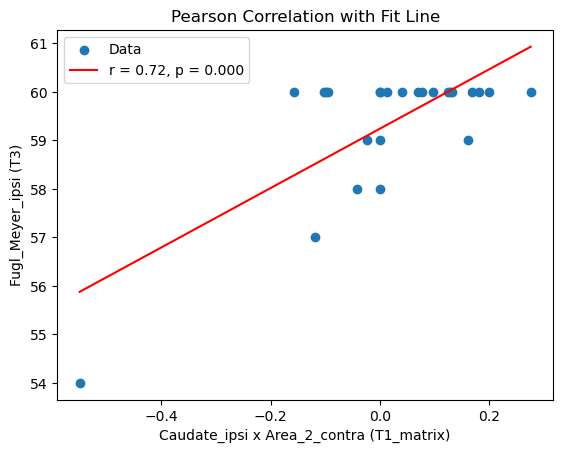

In [84]:
functions.check_corr(df_aligned, regression_T3, region1="Caudate_ipsi", region2="Area_2_contra", motor_test="Fugl_Meyer_ipsi", tp=3, corr_type='pearsonr')

Even though there is a plateau, we see something !! => but unaffected hand ...

## nmf motor spearman 

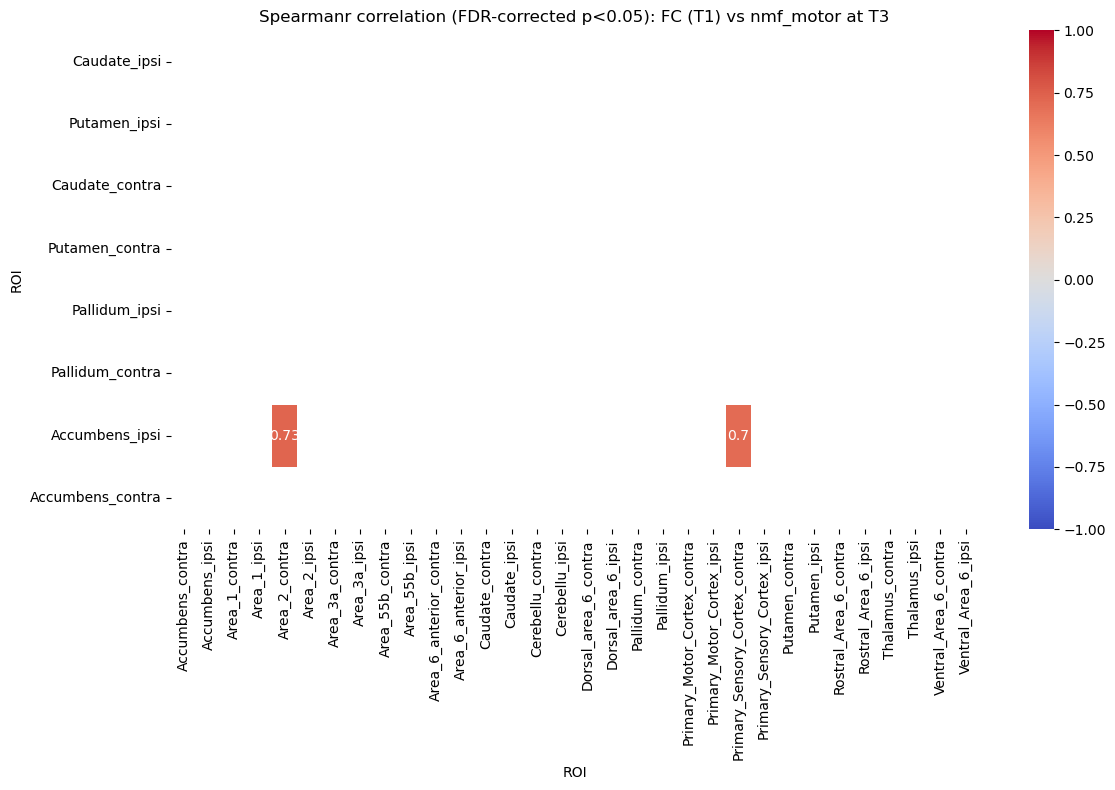

In [85]:
corr, pval, pval_corr = functions.motor_correlation(
    df_aligned,                   # DataFrame with subject_id and T1_matrix (named ROIs)
    regression_info,              # Behavioral data
    tp=3,
    motor_test='nmf_motor',
    corr_type='spearmanr',
    selected_rois_labels=striatum_labels,    # or a custom subset of labels
    mask_significant_only=True     
)

Spearman r = 0.728, p = 0.000


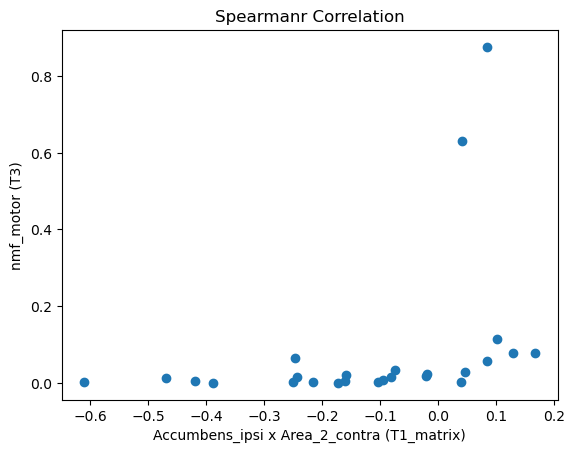

In [86]:
functions.check_corr(df_aligned, regression_T3, "Accumbens_ipsi", "Area_2_contra", tp=3, motor_test='nmf_motor', corr_type='spearmanr')


Spearman r = 0.705, p = 0.000


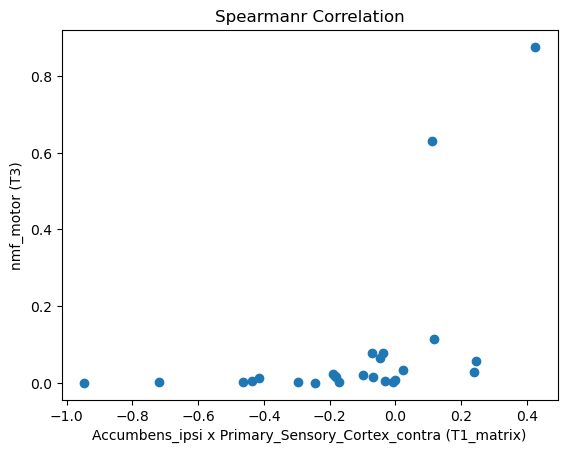

In [87]:
functions.check_corr(df_aligned, regression_T3, "Accumbens_ipsi", "Primary_Sensory_Cortex_contra", tp=3, motor_test='nmf_motor', corr_type='spearmanr')

# T4 whole group

In [88]:
regression_T4 = regression_info[
    (regression_info["TimePoint"] == "T4") &
    (regression_info["Behavioral_assessment"] == 1) &
    (regression_info["MRI"] == 1)
]

## FMI

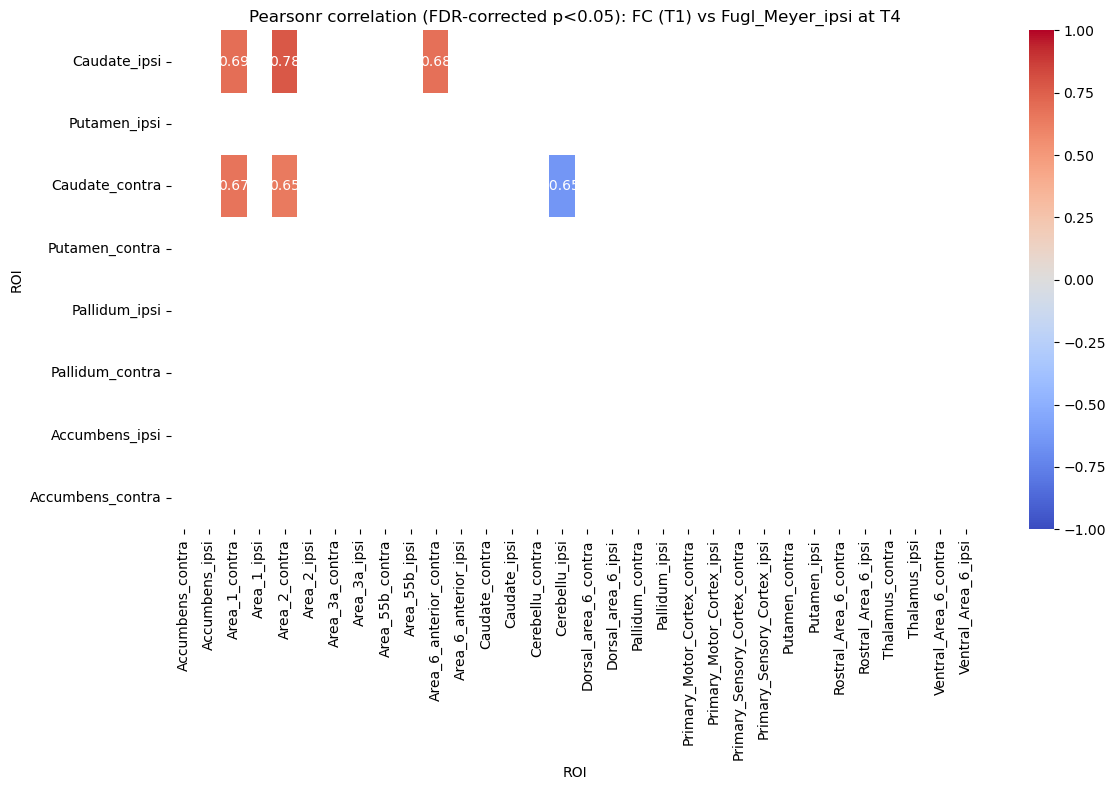

In [89]:
corr, pval, pval_corr = functions.motor_correlation(
    df_aligned,                   # DataFrame with subject_id and T1_matrix (named ROIs)
    regression_info,              # Behavioral data
    tp=4,
    motor_test='Fugl_Meyer_ipsi',
    corr_type='pearsonr',
    selected_rois_labels=striatum_labels,    # or a custom subset of labels
    mask_significant_only=True     
)

### Caudate ipsi

Pearson r = 0.694, p = 0.000


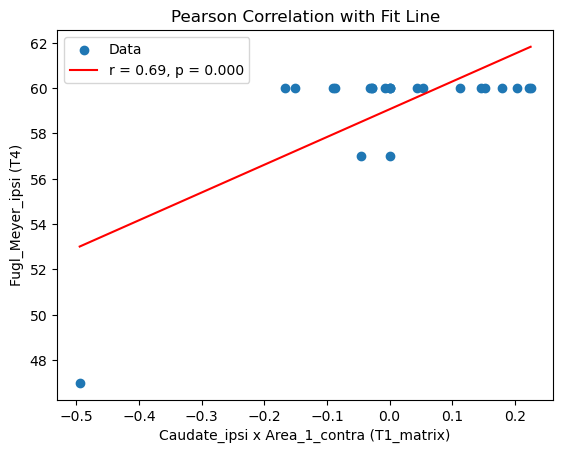

In [90]:
functions.check_corr(df_aligned, regression_T4, region1="Caudate_ipsi", region2="Area_1_contra", motor_test="Fugl_Meyer_ipsi", tp=4, corr_type='pearsonr')

Pearson r = 0.776, p = 0.000


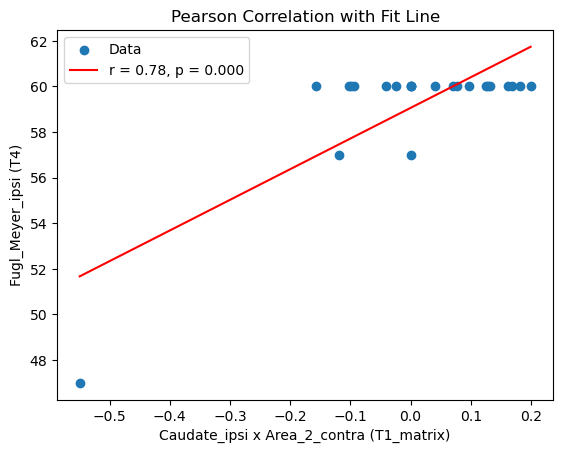

In [91]:
functions.check_corr(df_aligned, regression_T4, region1="Caudate_ipsi", region2="Area_2_contra", motor_test="Fugl_Meyer_ipsi", tp=4, corr_type='pearsonr')

Pearson r = 0.684, p = 0.000


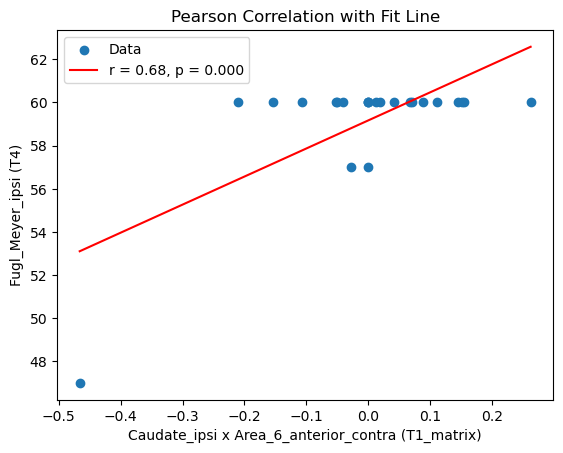

In [92]:
functions.check_corr(df_aligned, regression_T4, region1="Caudate_ipsi", region2="Area_6_anterior_contra", motor_test="Fugl_Meyer_ipsi", tp=4, corr_type='pearsonr')

### Caudate contra

Pearson r = 0.669, p = 0.000


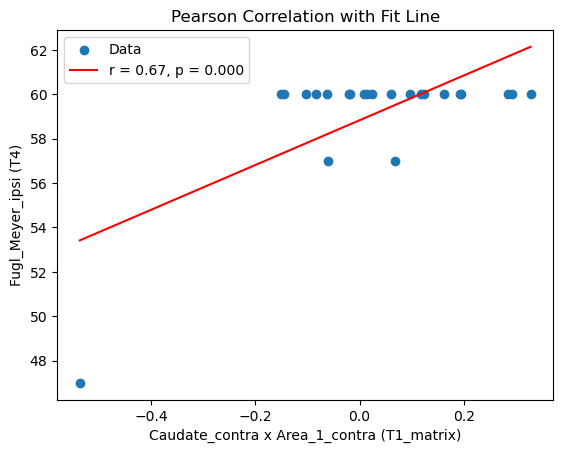

In [93]:
functions.check_corr(df_aligned, regression_T4, region1="Caudate_contra", region2="Area_1_contra", motor_test="Fugl_Meyer_ipsi", tp=4, corr_type='pearsonr')

Pearson r = 0.645, p = 0.001


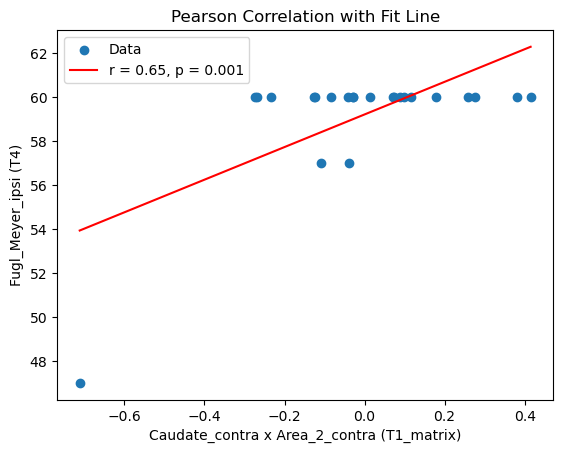

In [94]:
functions.check_corr(df_aligned, regression_T4, region1="Caudate_contra", region2="Area_2_contra", motor_test="Fugl_Meyer_ipsi", tp=4, corr_type='pearsonr')

Pearson r = -0.648, p = 0.001


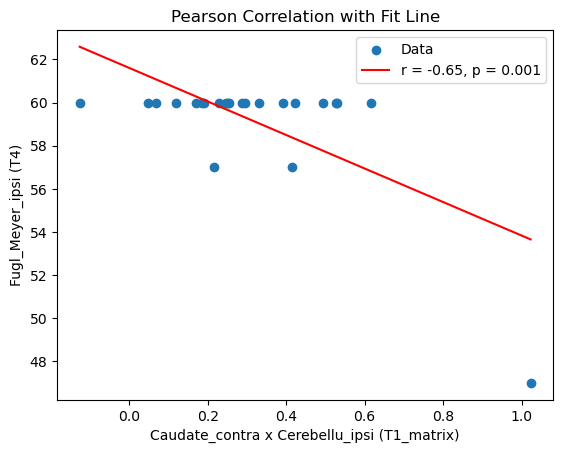

In [96]:
functions.check_corr(df_aligned, regression_T4, region1="Caudate_contra", region2="Cerebellu_ipsi", motor_test="Fugl_Meyer_ipsi", tp=4, corr_type='pearsonr')

# T3 R

## FMC Pearson

In [98]:
df_aligned_L, df_aligned_R = functions.split_by_lesion_side(df_aligned)

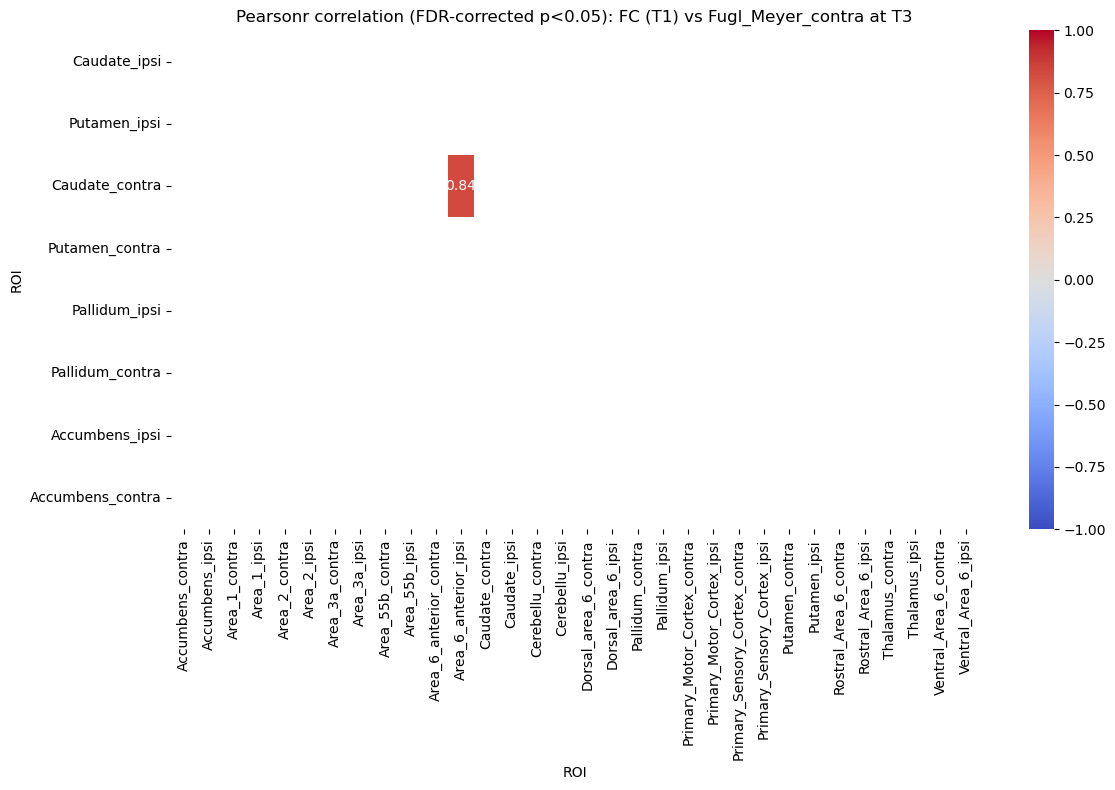

In [100]:
corr, pval, a = functions.motor_correlation(
    df_aligned_R,                   # DataFrame with subject_id and T1_matrix (named ROIs)
    regression_info,              # Behavioral data
    tp=3,
    motor_test='Fugl_Meyer_contra',
    corr_type='pearsonr',
    selected_rois_labels=striatum_labels,    # or a custom subset of labels
    mask_significant_only=True     
)

Pearson r = 0.835, p = 0.000


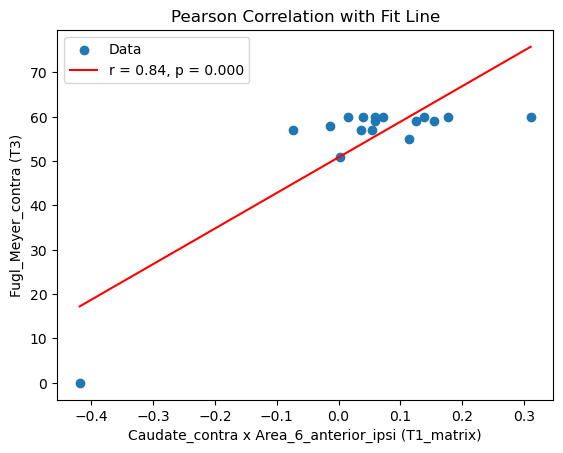

In [101]:
functions.check_corr(df_aligned_R, regression_T3, "Caudate_contra", "Area_6_anterior_ipsi", tp=3, motor_test='Fugl_Meyer_contra', corr_type='pearsonr')

## nmf Pearson

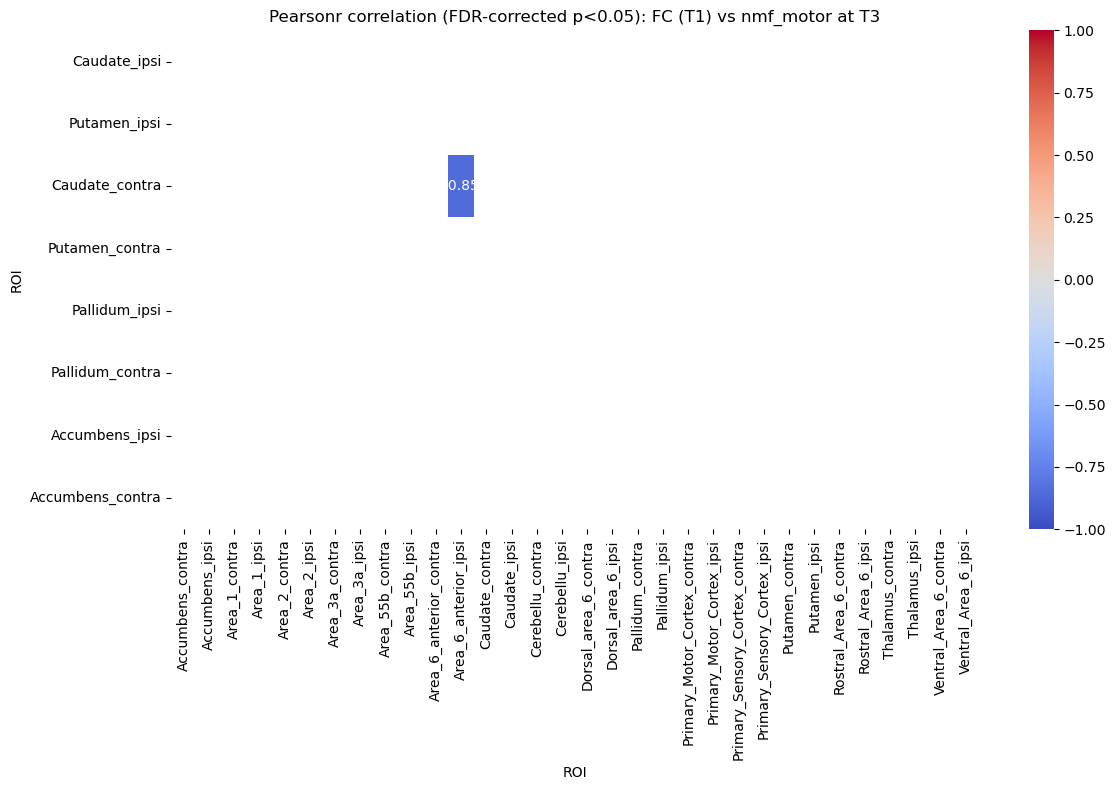

Pearson r = -0.852, p = 0.000


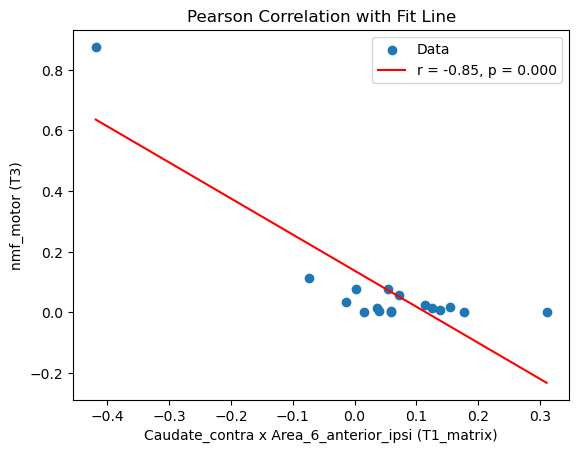

In [ ]:
corr, pval, a = functions.motor_correlation(
    df_aligned_R,                   # DataFrame with subject_id and T1_matrix (named ROIs)
    regression_info,              # Behavioral data
    tp=3,
    motor_test='nmf_motor',
    corr_type='pearsonr',
    selected_rois_labels=striatum_labels,    # or a custom subset of labels
    mask_significant_only=True     
)

In [ ]:
functions.check_corr(df_aligned_R, regression_T3, "Caudate_contra", "Area_6_anterior_ipsi", tp=3, motor_test='nmf_motor', corr_type='pearsonr')

## nmf spearman

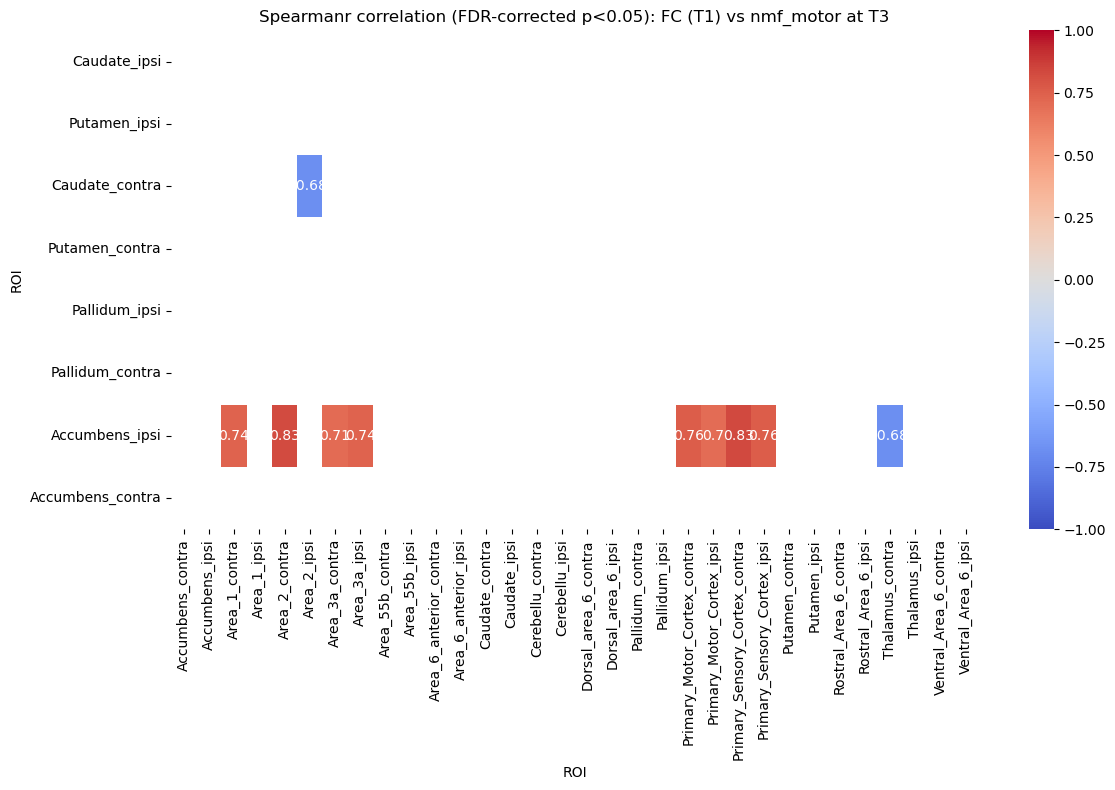

In [103]:
corr, pval, a = functions.motor_correlation(
    df_aligned_R,                   # DataFrame with subject_id and T1_matrix (named ROIs)
    regression_info,              # Behavioral data
    tp=3,
    motor_test='nmf_motor',
    corr_type='spearmanr',
    selected_rois_labels=striatum_labels,    # or a custom subset of labels
    mask_significant_only=True     
)

### caudate contra

Spearman r = -0.681, p = 0.003


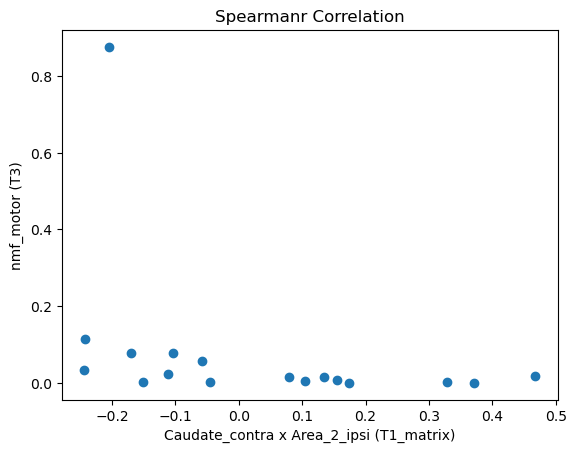

In [105]:
functions.check_corr(df_aligned_R, regression_T3, "Caudate_contra", "Area_2_ipsi", tp=3, motor_test='nmf_motor', corr_type='spearmanr')

=> bad !

Spearman r = 0.738, p = 0.001


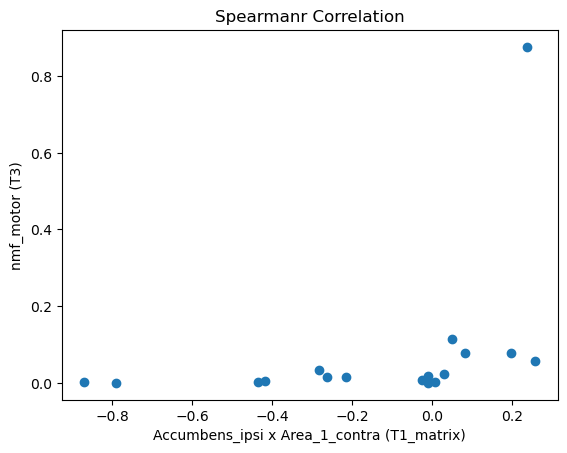

In [109]:
functions.check_corr(df_aligned_R, regression_T3, "Accumbens_ipsi", "Area_1_contra", tp=3, motor_test='nmf_motor', corr_type='spearmanr')

=> also bad

Spearman r = 0.826, p = 0.000


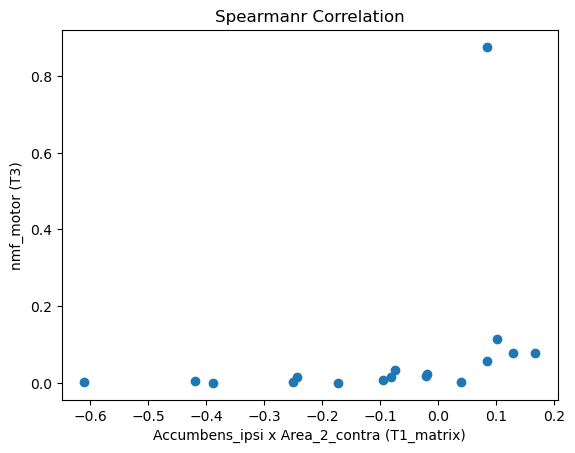

In [110]:
functions.check_corr(df_aligned_R, regression_T3, "Accumbens_ipsi", "Area_2_contra", tp=3, motor_test='nmf_motor', corr_type='spearmanr')

=> also bad

Spearman r = 0.711, p = 0.001


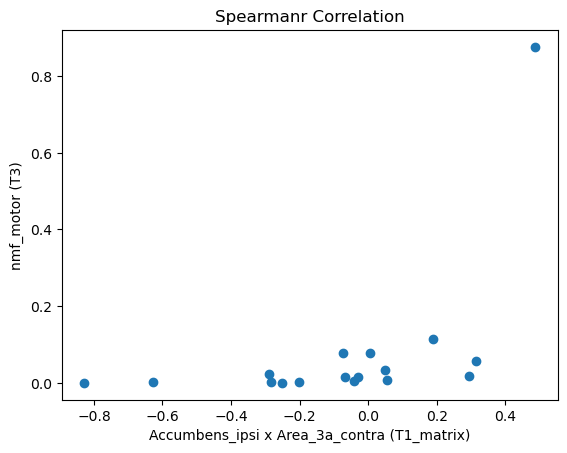

In [111]:
functions.check_corr(df_aligned_R, regression_T3, "Accumbens_ipsi", "Area_3a_contra", tp=3, motor_test='nmf_motor', corr_type='spearmanr')

=> better ?

Spearman r = 0.735, p = 0.001


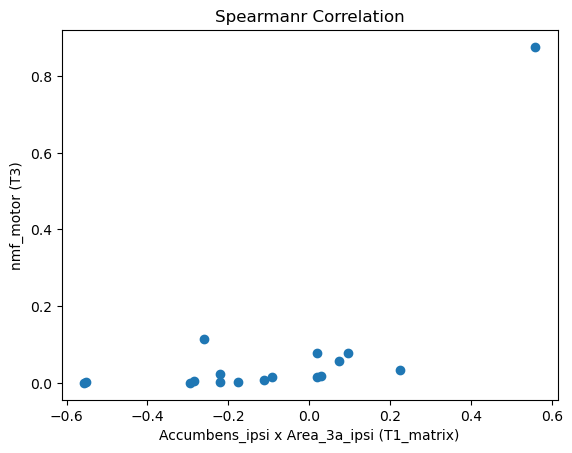

In [112]:
functions.check_corr(df_aligned_R, regression_T3, "Accumbens_ipsi", "Area_3a_ipsi", tp=3, motor_test='nmf_motor', corr_type='spearmanr')

=> better ?

Spearman r = 0.765, p = 0.000


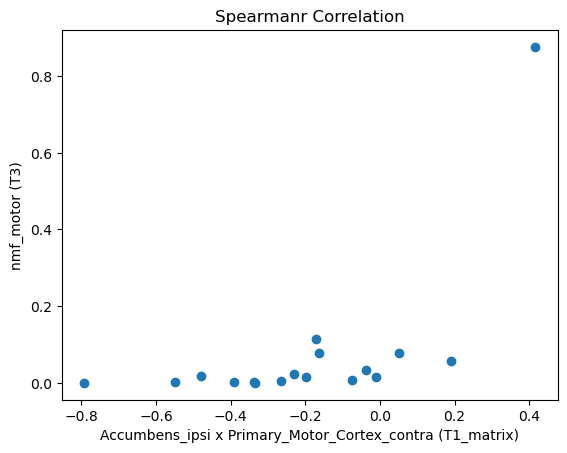

In [114]:
functions.check_corr(df_aligned_R, regression_T3, "Accumbens_ipsi", "Primary_Motor_Cortex_contra", tp=3, motor_test='nmf_motor', corr_type='spearmanr')

Spearman r = 0.699, p = 0.002


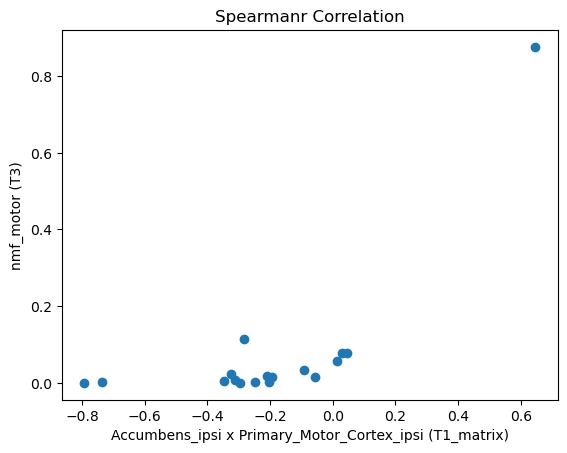

In [115]:
functions.check_corr(df_aligned_R, regression_T3, "Accumbens_ipsi", "Primary_Motor_Cortex_ipsi", tp=3, motor_test='nmf_motor', corr_type='spearmanr')

Spearman r = 0.833, p = 0.000


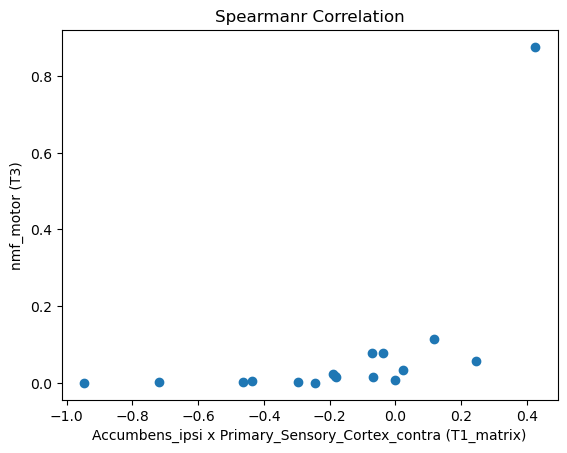

In [116]:
functions.check_corr(df_aligned_R, regression_T3, "Accumbens_ipsi", "Primary_Sensory_Cortex_contra", tp=3, motor_test='nmf_motor', corr_type='spearmanr')

Spearman r = 0.760, p = 0.000


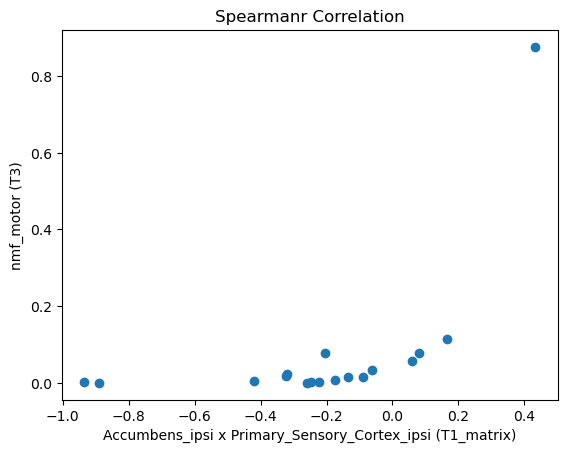

In [117]:
functions.check_corr(df_aligned_R, regression_T3, "Accumbens_ipsi", "Primary_Sensory_Cortex_ipsi", tp=3, motor_test='nmf_motor', corr_type='spearmanr')

Spearman r = -0.684, p = 0.002


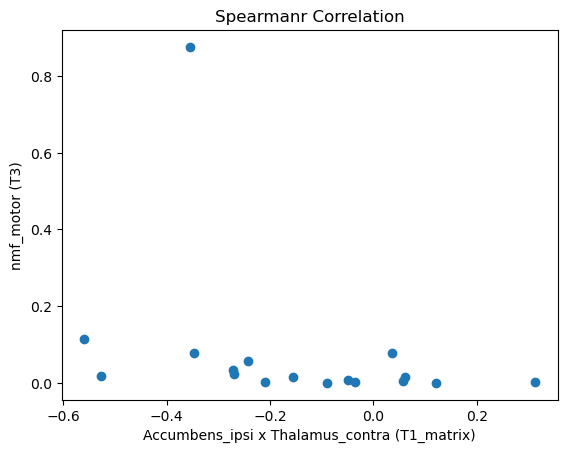

In [118]:
functions.check_corr(df_aligned_R, regression_T3, "Accumbens_ipsi", "Thalamus_contra", tp=3, motor_test='nmf_motor', corr_type='spearmanr')

hummmm

# T4 R

## FMI pearson

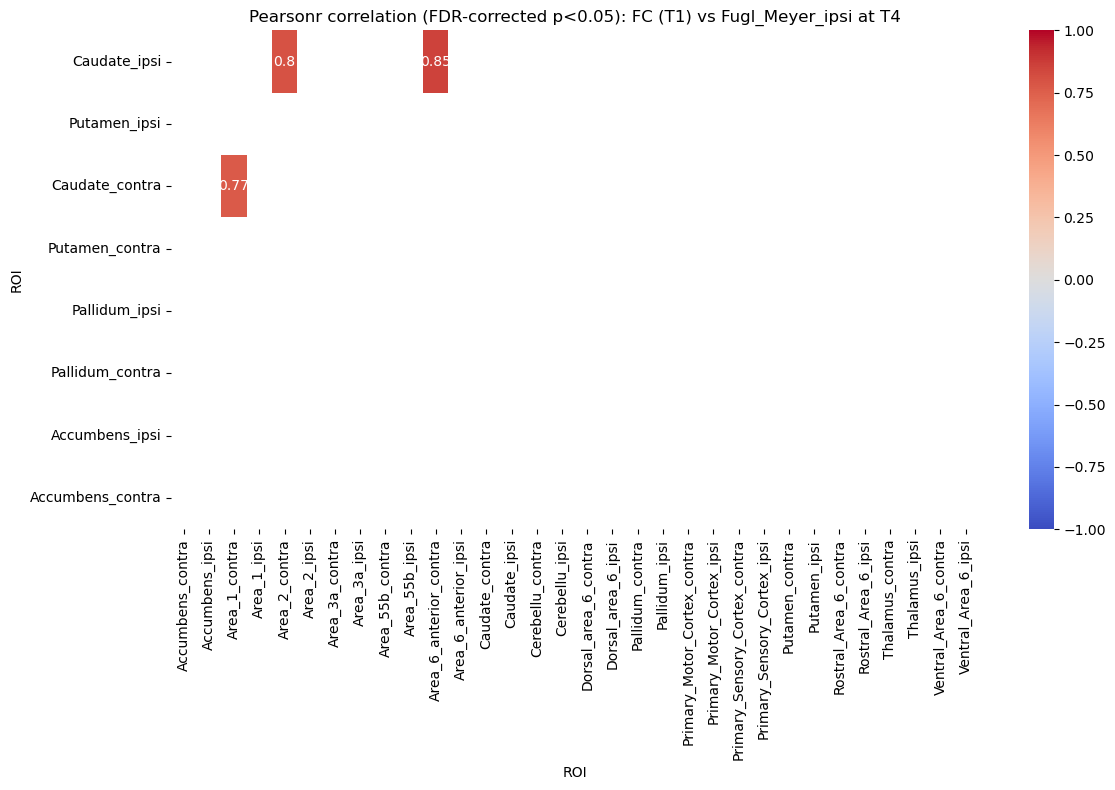

In [119]:
corr, pval, a = functions.motor_correlation(
    df_aligned_R,                   # DataFrame with subject_id and T1_matrix (named ROIs)
    regression_info,              # Behavioral data
    tp=4,
    motor_test='Fugl_Meyer_ipsi',
    corr_type='pearsonr',
    selected_rois_labels=striatum_labels,    # or a custom subset of labels
    mask_significant_only=True     
)

### caudate ipsi

Pearson r = 0.801, p = 0.000


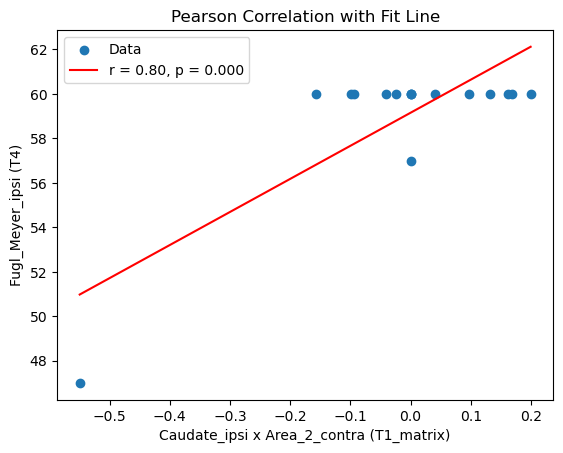

In [120]:
functions.check_corr(df_aligned_R, regression_T4, "Caudate_ipsi", "Area_2_contra", tp=4, motor_test='Fugl_Meyer_ipsi', corr_type='pearsonr')

Pearson r = 0.855, p = 0.000


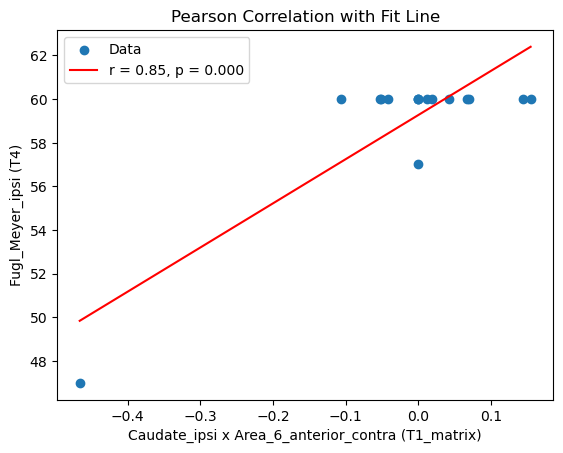

In [121]:
functions.check_corr(df_aligned_R, regression_T4, "Caudate_ipsi", "Area_6_anterior_contra", tp=4, motor_test='Fugl_Meyer_ipsi', corr_type='pearsonr')

### Caudate contra

Pearson r = 0.773, p = 0.000


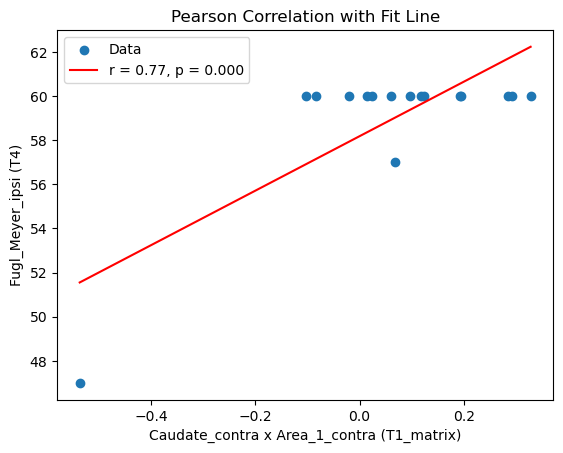

In [122]:
functions.check_corr(df_aligned_R, regression_T4, "Caudate_contra", "Area_1_contra", tp=4, motor_test='Fugl_Meyer_ipsi', corr_type='pearsonr')